In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("google_trends.csv")
df

,month,search_freq
0,2004-01-01,0
1,2004-02-01,0
2,2004-03-01,0
3,2004-04-01,0
4,2004-05-01,0
...,...,...
220,2022-05-01,82
221,2022-06-01,78
222,2022-07-01,77
223,2022-08-01,77


In [3]:
df["search_freq"] = df.search_freq.astype(float)

In [4]:
df["month"] = pd.to_datetime(df["month"])

In [5]:
df.set_index("month", inplace=True)

<AxesSubplot:xlabel='month'>

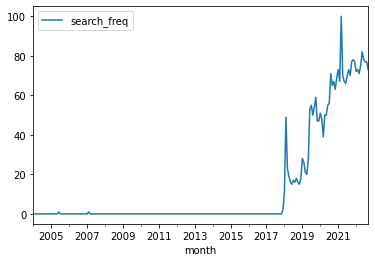

In [6]:
df.plot()

In [7]:
df[df.index.year >= 2018]

,search_freq
month,
2018-01-01,11.0
2018-02-01,49.0
2018-03-01,23.0
2018-04-01,19.0
2018-05-01,16.0
2018-06-01,15.0
2018-07-01,17.0
2018-08-01,16.0
2018-09-01,18.0


In [8]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model = ExponentialSmoothing(df[df.index.year >= 2018].search_freq).fit()
forecast = model.forecast(10)
forecast

/home/alatus/anaconda3/envs/10_days_AI/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


2022-10-01    75.007953
2022-11-01    75.007953
2022-12-01    75.007953
2023-01-01    75.007953
2023-02-01    75.007953
2023-03-01    75.007953
2023-04-01    75.007953
2023-05-01    75.007953
2023-06-01    75.007953
2023-07-01    75.007953
Freq: MS, dtype: float64

/home/alatus/anaconda3/envs/10_days_AI/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/alatus/anaconda3/envs/10_days_AI/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/alatus/anaconda3/envs/10_days_AI/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<AxesSubplot:>

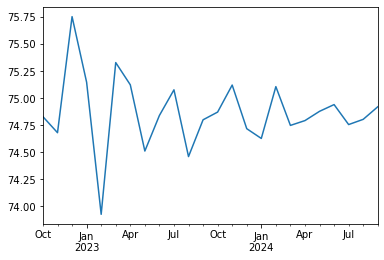

In [9]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df[df.index.year >= 2018].search_freq, order=(12,1,1)).fit()
forecast = model.forecast(24)
forecast.plot()

 ARIMA(0,1,1)(0,0,0)[0] intercept


<AxesSubplot:>

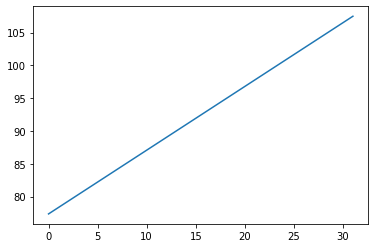

In [10]:
#!pip install pmdarima
from pmdarima.arima import auto_arima
import matplotlib.pyplot as plt

model = auto_arima(df[df.index.year >= 2018], start_p=0, start_q=0)
#model.fit(df)

def forecast_to_df(model, steps=32):
    forecast, conf_int = model.predict(n_periods=steps, return_conf_int=True)
    pred_df=pd.DataFrame()
    pred_df["lower"] = conf_int[:,0]
    pred_df["upper"] = conf_int[:,1]
    pred_df["pred"] = forecast.values
    return pred_df

pred_df = forecast_to_df(model)

print(model)

# Plotting Predictions
def plot_train_test_pred(train,test,pred_df):
    fig,ax = plt.subplots(figsize=(12,7))
    kws = dict(marker='o')
    
    ax.plot(train,label='Train',**kws)
    #ax.plot(test,label='Test',**kws)
    ax.plot(pred_df['pred'],label='Prediction',ls='--',linewidth=3)

    ax.fill_between(x=pred_df.index,y1=pred_df['lower'],y2=pred_df['upper'],alpha=0.3)
    ax.set_title('Model Validation', fontsize=22)
    ax.legend(loc='upper left')
    fig.tight_layout()
    return fig,ax

#plot_train_test_pred(df, None, pred_df)

pred_df.pred.plot()

<AxesSubplot:xlabel='month'>

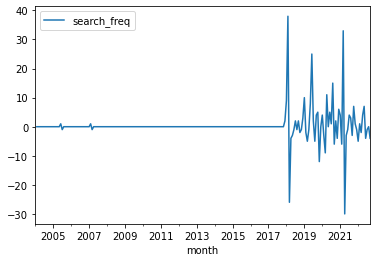

In [11]:
df.diff(1).plot()

<AxesSubplot:xlabel='month'>

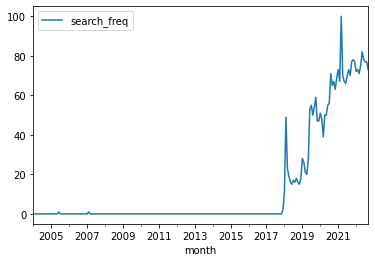

In [12]:
df.plot()

In [13]:
df.describe()

,search_freq
count,225.000000
mean,13.222222
std,25.560755
min,0.000000
25%,0.000000
50%,0.000000
75%,11.000000
max,100.000000
